In [76]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Flatten,Reshape,LeakyReLU,ReLU,Dense,Dropout,Conv2D,MaxPool2D,BatchNormalization
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')


In [77]:
a=fashion_mnist.load_data()

In [78]:
(X_train,y_train),(X_test,y_test)=a

In [79]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


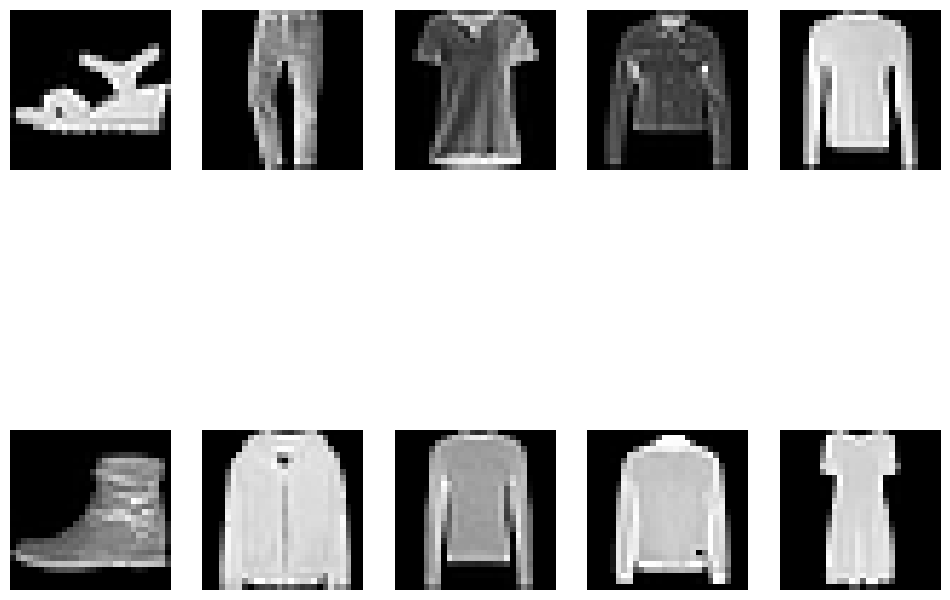

In [80]:
fig,axes=plt.subplots(2,5,figsize=(12,10))
for i ,ax in enumerate(axes.ravel()):
    a=np.random.randint(X_train.shape[0])
    ax.imshow(X_train[a],cmap='grey')
    ax.axis('off')

In [81]:
X_train=X_train/255.0
X_test=X_test/255.0
X_train=X_train*2-1
X_test=X_test*2-1

In [82]:
Generator=Sequential()
Generator.add(Dense(512,input_shape=[100]))
Generator.add(LeakyReLU(alpha=.2))
Generator.add(BatchNormalization(momentum=.8))

Generator.add(Dense(256))
Generator.add(LeakyReLU(alpha=.2))
Generator.add(BatchNormalization(momentum=.8))

Generator.add(Dense(128))
Generator.add(LeakyReLU(alpha=.2))
Generator.add(BatchNormalization(momentum=.8))

Generator.add(Dense(28*28))
Generator.add(Reshape([28,28,1]))

In [83]:
Generator.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 512)               51712     
                                                                 
 leaky_re_lu_23 (LeakyReLU)  (None, 512)               0         
                                                                 
 batch_normalization_15 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_33 (Dense)            (None, 256)               131328    
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 256)               0         
                                                                 
 batch_normalization_16 (Bat  (None, 256)              1024      
 chNormalization)                                    

In [84]:
Descrimnator=Sequential()
Descrimnator.add(Flatten(input_shape=([28,28,1])))

Descrimnator.add(Dense(512))
Descrimnator.add(LeakyReLU(alpha=.2))
Descrimnator.add(Dropout(.5))

Descrimnator.add(Dense(256))
Descrimnator.add(LeakyReLU(alpha=.2))
Descrimnator.add(Dropout(.5))

Descrimnator.add(Dense(1,activation='sigmoid'))


In [85]:
Descrimnator.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 512)               401920    
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 512)               0         
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_37 (Dense)            (None, 256)               131328    
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 256)               0         
                                                                 
 dropout_9 (Dropout)         (None, 256)             

In [86]:
GAN=Sequential([Generator,Descrimnator])
GAN.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (None, 28, 28, 1)         320656    
                                                                 
 sequential_15 (Sequential)  (None, 1)                 533505    
                                                                 
Total params: 854,161
Trainable params: 852,369
Non-trainable params: 1,792
_________________________________________________________________


In [87]:
Descrimnator.compile(optimizer='adam',loss='binary_crossentropy')

Descrimnator.trainable=False
GAN.compile(optimizer='adam',loss="binary_crossentropy")

In [88]:
GAN.layers

currently on eboch 0
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Currently on batch number 400 of 937
	Currently on batch number 450 of 937
	Currently on batch number 500 of 937
	Currently on batch number 550 of 937
	Currently on batch number 600 of 937
	Currently on batch number 650 of 937
	Currently on batch number 700 of 937
	Currently on batch number 750 of 937
	Currently on batch number 800 of 937
	Currently on batch number 850 of 937
	Currently on batch number 900 of 937
1/1 [==============================] - 0s 23ms/step


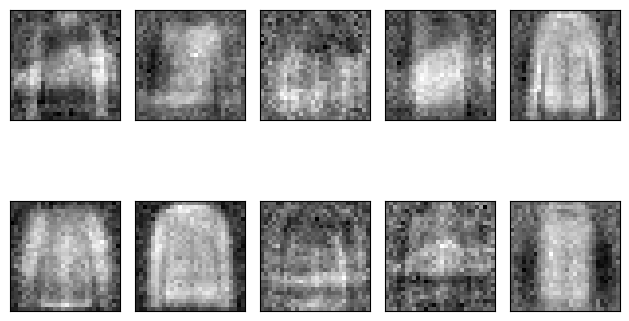

currently on eboch 1
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Currently on batch number 400 of 937
	Currently on batch number 450 of 937
	Currently on batch number 500 of 937
	Currently on batch number 550 of 937
	Currently on batch number 600 of 937
	Currently on batch number 650 of 937
	Currently on batch number 700 of 937
	Currently on batch number 750 of 937
	Currently on batch number 800 of 937
	Currently on batch number 850 of 937
	Currently on batch number 900 of 937
currently on eboch 2
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Currently

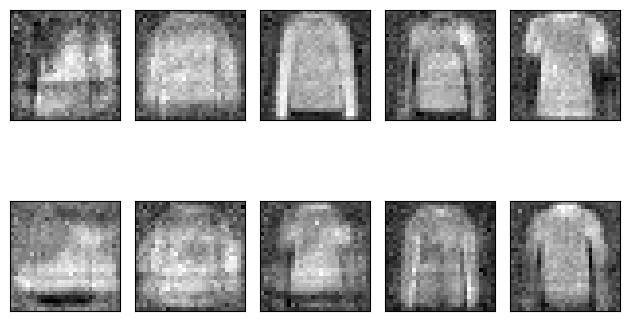

currently on eboch 11
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Currently on batch number 400 of 937
	Currently on batch number 450 of 937
	Currently on batch number 500 of 937
	Currently on batch number 550 of 937
	Currently on batch number 600 of 937
	Currently on batch number 650 of 937
	Currently on batch number 700 of 937
	Currently on batch number 750 of 937
	Currently on batch number 800 of 937
	Currently on batch number 850 of 937
	Currently on batch number 900 of 937
currently on eboch 12
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Current

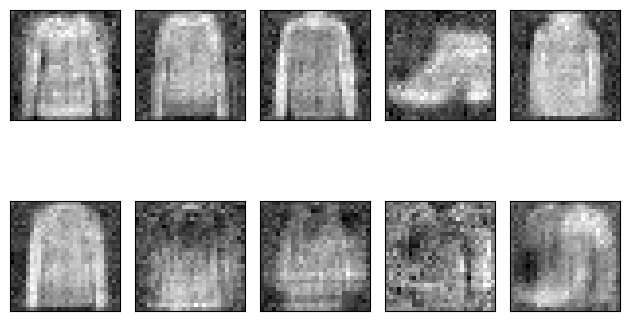

currently on eboch 21
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Currently on batch number 400 of 937
	Currently on batch number 450 of 937
	Currently on batch number 500 of 937
	Currently on batch number 550 of 937
	Currently on batch number 600 of 937
	Currently on batch number 650 of 937
	Currently on batch number 700 of 937
	Currently on batch number 750 of 937
	Currently on batch number 800 of 937
	Currently on batch number 850 of 937
	Currently on batch number 900 of 937
currently on eboch 22
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Current

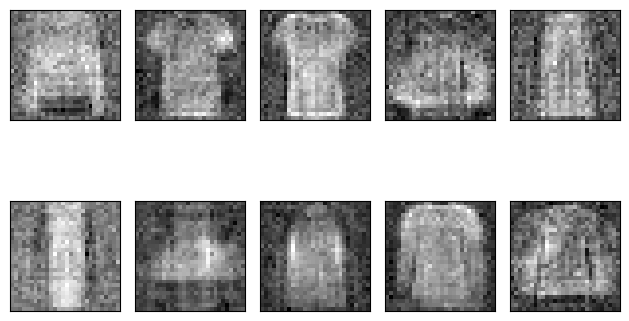

currently on eboch 31
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Currently on batch number 400 of 937
	Currently on batch number 450 of 937
	Currently on batch number 500 of 937
	Currently on batch number 550 of 937
	Currently on batch number 600 of 937
	Currently on batch number 650 of 937
	Currently on batch number 700 of 937
	Currently on batch number 750 of 937
	Currently on batch number 800 of 937
	Currently on batch number 850 of 937
	Currently on batch number 900 of 937
currently on eboch 32
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Current

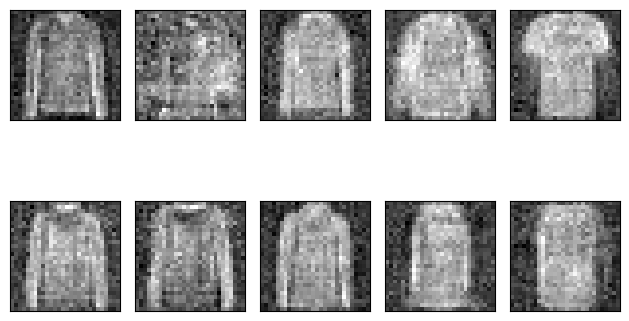

currently on eboch 41
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Currently on batch number 400 of 937
	Currently on batch number 450 of 937
	Currently on batch number 500 of 937
	Currently on batch number 550 of 937
	Currently on batch number 600 of 937
	Currently on batch number 650 of 937
	Currently on batch number 700 of 937
	Currently on batch number 750 of 937
	Currently on batch number 800 of 937
	Currently on batch number 850 of 937
	Currently on batch number 900 of 937
currently on eboch 42
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Current

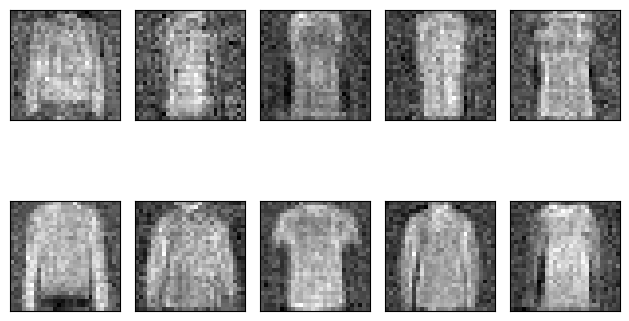

currently on eboch 51
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Currently on batch number 400 of 937
	Currently on batch number 450 of 937
	Currently on batch number 500 of 937
	Currently on batch number 550 of 937
	Currently on batch number 600 of 937
	Currently on batch number 650 of 937
	Currently on batch number 700 of 937
	Currently on batch number 750 of 937
	Currently on batch number 800 of 937
	Currently on batch number 850 of 937
	Currently on batch number 900 of 937
currently on eboch 52
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Current

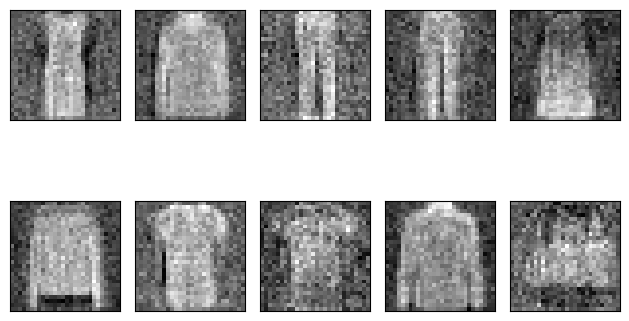

currently on eboch 61
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Currently on batch number 400 of 937
	Currently on batch number 450 of 937
	Currently on batch number 500 of 937
	Currently on batch number 550 of 937
	Currently on batch number 600 of 937
	Currently on batch number 650 of 937
	Currently on batch number 700 of 937
	Currently on batch number 750 of 937
	Currently on batch number 800 of 937
	Currently on batch number 850 of 937
	Currently on batch number 900 of 937
currently on eboch 62
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Current

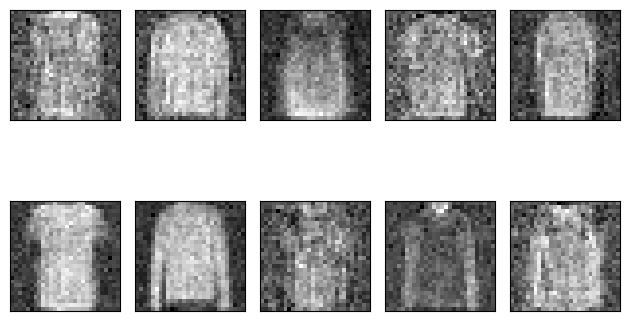

currently on eboch 71
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Currently on batch number 400 of 937
	Currently on batch number 450 of 937
	Currently on batch number 500 of 937
	Currently on batch number 550 of 937
	Currently on batch number 600 of 937
	Currently on batch number 650 of 937
	Currently on batch number 700 of 937
	Currently on batch number 750 of 937
	Currently on batch number 800 of 937
	Currently on batch number 850 of 937
	Currently on batch number 900 of 937
currently on eboch 72
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Current

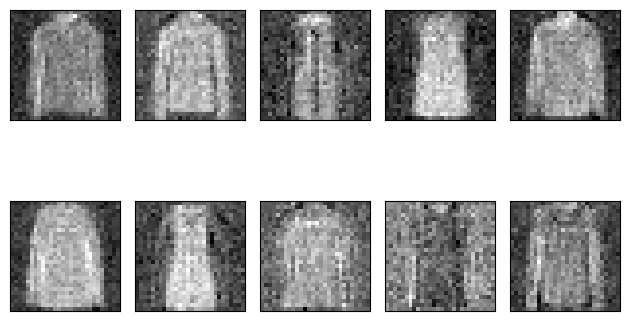

currently on eboch 81
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Currently on batch number 400 of 937
	Currently on batch number 450 of 937
	Currently on batch number 500 of 937
	Currently on batch number 550 of 937
	Currently on batch number 600 of 937
	Currently on batch number 650 of 937
	Currently on batch number 700 of 937
	Currently on batch number 750 of 937
	Currently on batch number 800 of 937
	Currently on batch number 850 of 937
	Currently on batch number 900 of 937
currently on eboch 82
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Current

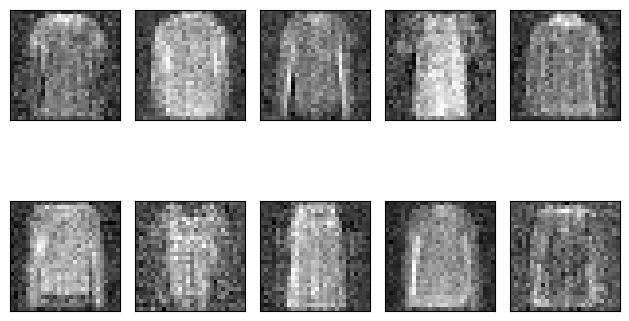

currently on eboch 91
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Currently on batch number 400 of 937
	Currently on batch number 450 of 937
	Currently on batch number 500 of 937
	Currently on batch number 550 of 937
	Currently on batch number 600 of 937
	Currently on batch number 650 of 937
	Currently on batch number 700 of 937
	Currently on batch number 750 of 937
	Currently on batch number 800 of 937
	Currently on batch number 850 of 937
	Currently on batch number 900 of 937
currently on eboch 92
	Currently on batch number 50 of 937
	Currently on batch number 100 of 937
	Currently on batch number 150 of 937
	Currently on batch number 200 of 937
	Currently on batch number 250 of 937
	Currently on batch number 300 of 937
	Currently on batch number 350 of 937
	Current

KeyboardInterrupt: 

In [91]:
epochs=200
batch_size=64
noise_shape=100
for i in range(epochs):
    print(f"currently on eboch {i}")
    for j in range(X_train.shape[0]//batch_size):
        if ((j+1)%50==0):
            print(f"\tCurrently on batch number {j+1} of {X_train.shape[0]//batch_size}")


        random=np.random.normal(size=[batch_size,noise_shape])
        gen_image=Generator.predict_on_batch(random)

        #Train Descrimnator on real image
        aa=np.ones(shape=(batch_size,1))
        Descrimnator.trainable=True
        d_loss_real=Descrimnator.train_on_batch(X_train[j*batch_size:(j+1)*batch_size],aa)

        #train descrimnator on fake data

        ff=np.zeros(shape=(batch_size,1))
        d_loss_fake=Descrimnator.train_on_batch(gen_image,ff)
    


        #train Generator

        noise=np.random.normal(size=[batch_size,noise_shape])
        labels=np.ones(shape=(batch_size,1))
        Descrimnator.trainable=False
        d_g_loss_batch=GAN.train_on_batch(noise,labels)

    if i % 10 == 0:
        samples = 10
        x_fake = Generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()
